In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


# Exploratory Data Analysis
- This document aims to analyze the performance and career success(promotion) of UNDP & UNICEF staff who have been evaluated in 2016~2019.
- Gender, breath of work experience, Work experience in hardship duty station, and total number of years of service will be the main variables for the analysis. 

In [7]:
finaldf=pd.read_csv('finaldf.csv')

In [8]:
# Total number of staff for analysis is 15090
len(finaldf)

15090

In [9]:
# Names of variables
finaldf.columns

Index(['Index No', 'Organization', 'Gender', 'Nationality', 'Hire Date',
       'DS Location', 'DS Country', 'Family/Non-Family', 'Position_Count',
       'Years of Service', 'Age', 'Hardship_min', 'Hardship_median',
       'Hardship_max', 'Min_Incumbent', 'Max_Incumbent',
       'Add Contingent Worker', 'Additional Job', 'CSL Half Pay Only',
       'Category Change', 'Change Employment Percentage',
       'Change Personal Data', 'Change in Grade', 'Change in Pay',
       'Contract Change', 'Correct Staff Birth Date',
       'Correct staff birth date', 'Corrected Entry Date',
       'Create Fam Member/Dependents', 'Data Change', 'Demotion',
       'Double Incumbency', 'Entry into UNJSPF', 'Family Status Change',
       'Grant Maternity/Paternity Leav', 'HR Conversion', 'Hire',
       'Incorrect Entry Date', 'Initial Appt - Pernr exist',
       'Initial appointment', 'Lateral Move', 'Lateral Move - Loan',
       'Leave of Absence', 'Local Transfer to SAP', 'Long Term Absence',
       'L

## Gender difference in UNDP & UNICEF

In [10]:
gender_groupby = finaldf.groupby(["Gender", "Performance_mean"]).agg({'Index No':'count'})
gender_groupby = pd.DataFrame(gender_groupby).reset_index()

In [11]:
gender_performance_pct = gender_groupby.groupby(['Gender', "Performance_mean"]).agg({"Index No":'sum'}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
gender_performance_pct = pd.DataFrame(gender_performance_pct).reset_index()

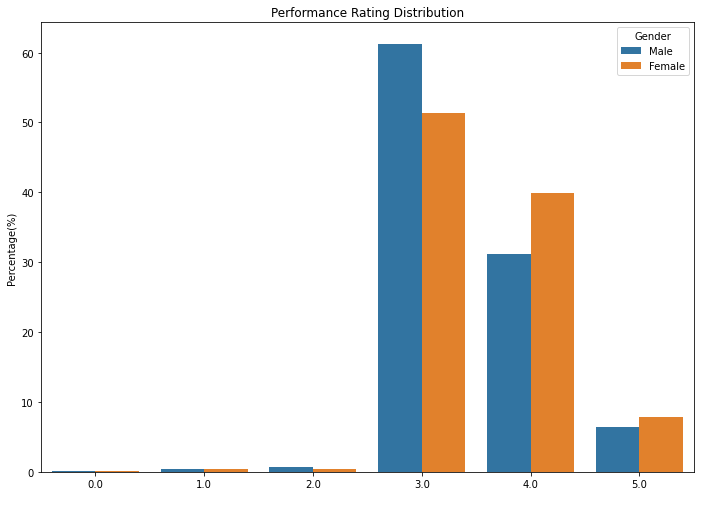

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
labels=['Male','Female']
sns.barplot(data=gender_performance_pct, x="Performance_mean", y= "Index No", hue="Gender", hue_order=labels)
plt.title('Performance Rating Distribution')
plt.xlabel(' ')
plt.ylabel('Percentage(%)')
plt.show()

- Most UN staffs get 3 or higher score in the performance evaluation. 
- Female staffs tends to get higher score such as 4 or 5 than male staffs.

In [13]:
# Make new column "Difference in incumbent grade to calculate increase in grade"
finaldf['Difference_incumbent'] = finaldf['Max_Incumbent']-finaldf['Min_Incumbent']
incumbent = finaldf[['Difference_incumbent', 'Gender']]

In [14]:
incumbent_pct = incumbent.groupby(['Gender','Difference_incumbent']).agg({"Difference_incumbent":'count'}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
incumbent_pct = pd.DataFrame(incumbent_pct)
incumbent_pct = incumbent_pct.rename(columns={'Gender':'Gender','Difference_incumbent':'Difference_incumbent', 'Difference_incumbent':'Percentage'}).reset_index()
incumbent_pct = incumbent_pct.sort_values('Difference_incumbent', ascending = False)

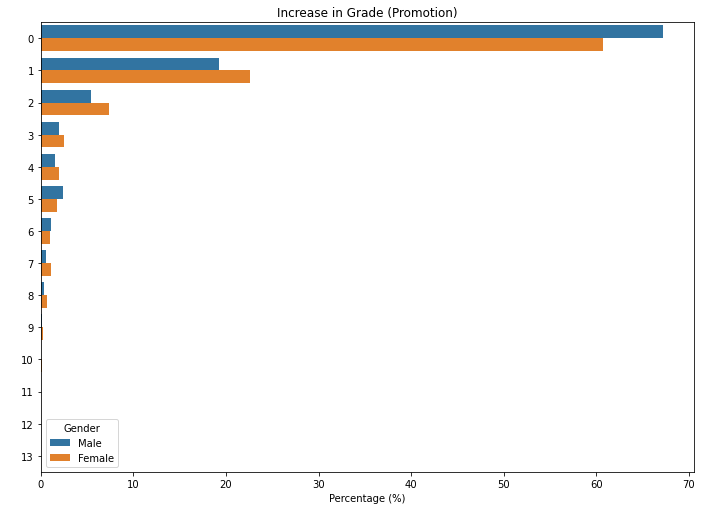

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
labels=['Male','Female']
sns.barplot(data=incumbent_pct, x='Percentage', y="Difference_incumbent", hue="Gender", hue_order=labels, orient='h')
plt.title('Increase in Grade (Promotion)')
plt.xlabel('Percentage (%)')
plt.ylabel(' ')
plt.show()

- Majority of men and women couldn't get a chance to be promoted, as most of them are ranked in 0.
- Female staffs are more likely to get promoted during their years of service. 

In [16]:
hard_groupby = finaldf.groupby(["Gender", "Hardship_max"]).agg({'Index No':'count'})
hard_groupby = pd.DataFrame(hard_groupby).reset_index()
hard_pct = hard_groupby.groupby(['Gender', "Hardship_max"]).agg({"Index No":'sum'}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
hard_pct = pd.DataFrame(hard_pct).reset_index()

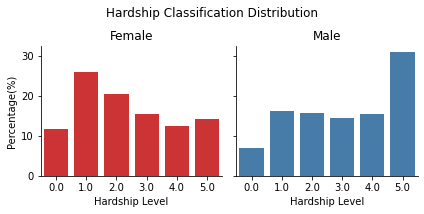

In [17]:
grid = sns.FacetGrid(data=hard_pct, col='Gender', hue='Gender', palette='Set1')
grid.map(sns.barplot, "Hardship_max", "Index No")
grid.fig.subplots_adjust(top=0.8)
grid.fig.suptitle("Hardship Classification Distribution")

axes = grid.axes.flatten()
axes[0].set_title("Female")
axes[1].set_title("Male")
axes[0].set_ylabel("Percentage(%)")
axes[0].set_xlabel("Hardship Level")
axes[1].set_xlabel("Hardship Level")
plt.show();

- Hardship_level = {'H': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
- A is Hard E is the Most hardest and H is for HQ duty station.

- Higher percentage of female staffs worked only in HQ (level 1) compared to male staffs.
- About 50% of female staffs worked at level 1 or 2.
- More than 30% of Male staff has worked in the level 5 hardship duty station, whereas only about 13% of Female staff has been in the level 5. 

## Promotion & Breadth of experience

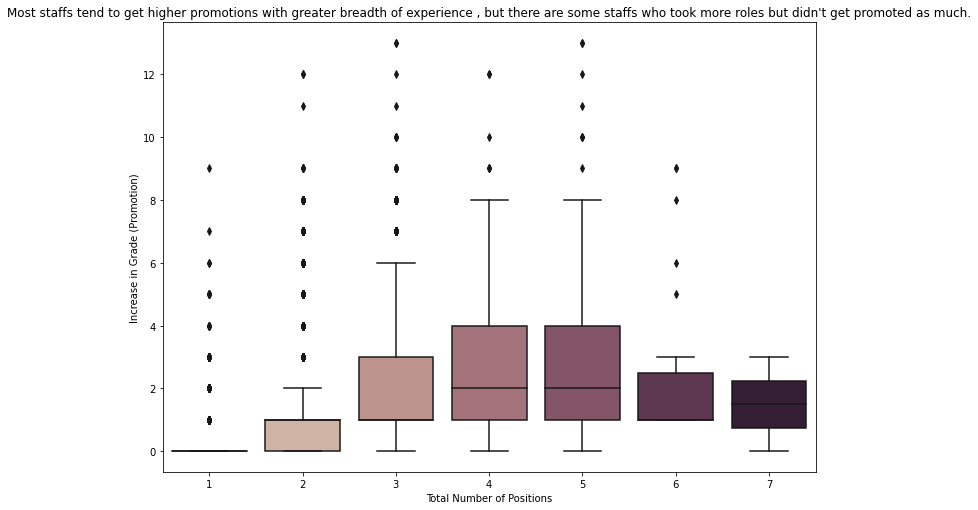

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(data=finaldf,
            x="Position_Count",
            y="Difference_incumbent", palette="ch:.25")
plt.title("Most staffs tend to get higher promotions with greater breadth of experience , but there are some staffs who took more roles but didn't get promoted as much.")
plt.xlabel('Total Number of Positions')
plt.ylabel('Increase in Grade (Promotion)')
plt.show()

## Performance rating in UNICEF & UNDP

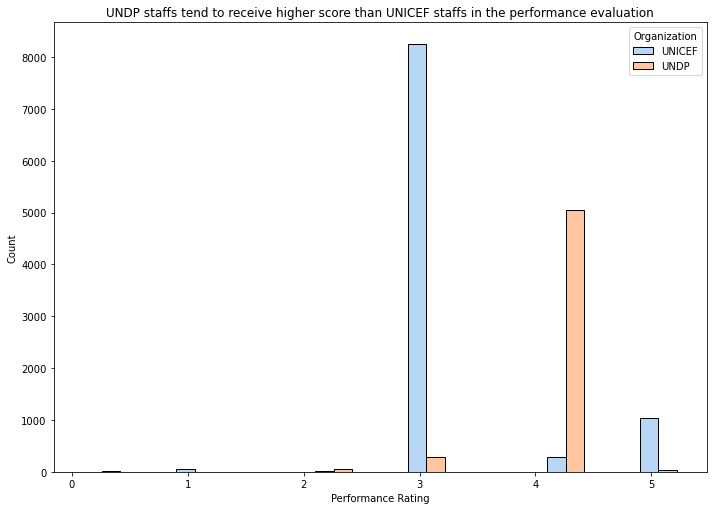

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.histplot(data=finaldf, x="Performance_mean", hue="Organization", multiple="dodge", shrink=.8, binwidth=0.4, palette="pastel")
plt.title('UNDP staffs tend to receive higher score than UNICEF staffs in the performance evaluation')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.show()

## Total Years of Service & Promotion

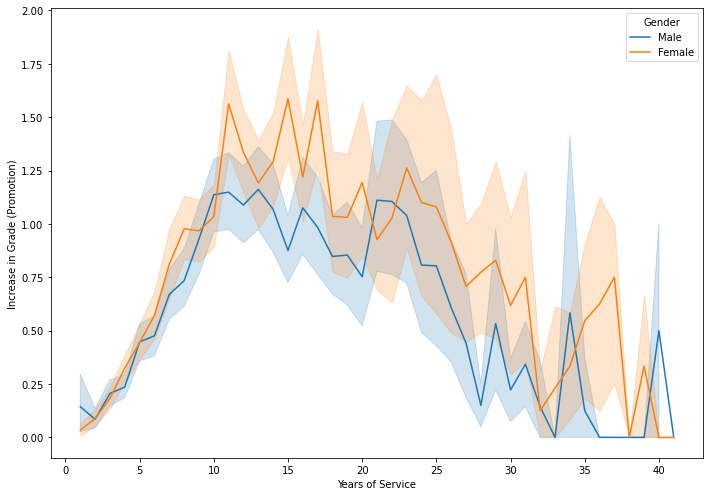

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(data=finaldf,
            x="Years of Service",
            y="Difference_incumbent", hue='Gender')
plt.xlabel('Years of Service')
plt.ylabel('Increase in Grade (Promotion)')
plt.show()

- The line shows the estimated central tendency of the data, and the area around the line indicates the confidence interval (a range of values that's likely to include a population value).
- The degree of promotion is raised up till the staff have 10 years of service, and decreases as the years of service increases.
- People who have worked 10-17 years got more promotions than the others. 
- In general, women who worked 12 years get a 1.6 increase in grade, but the confidence interval spans from 1.25 - 1.75.
- In general, women have a higher increase in grades than men.

## Comparison of Top Performers & Low Performers 

In [21]:
top = finaldf.sort_values(['Performance_mean'],ascending = False).head(100)
top['top_bottom'] = 'Top 100'

In [22]:
bottom = finaldf.sort_values(['Performance_mean'],ascending = False).tail(100)
bottom['top_bottom'] = 'Low 100'

In [23]:
top_bottom = pd.concat([top, bottom])

In [24]:
hard = top_bottom.groupby(['top_bottom','Hardship_max'])['Index No'].count().reset_index()

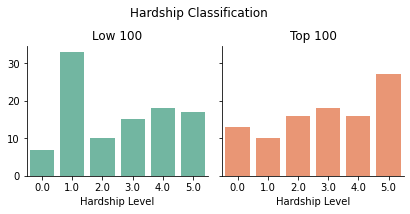

In [25]:
grid = sns.FacetGrid(data=hard, col='top_bottom', hue='top_bottom', palette='Set2')
grid.map(sns.barplot, "Hardship_max", "Index No")
grid.fig.subplots_adjust(top=0.8)
grid.fig.suptitle("Hardship Classification")

axes = grid.axes.flatten()
axes[0].set_title("Low 100")
axes[1].set_title("Top 100")
axes[0].set_ylabel("")
axes[0].set_xlabel("Hardship Level")
axes[1].set_xlabel("Hardship Level")
plt.show();

- Top performers have working experience in the harder locations, compared to low performers, though most of the low performers have experience in hardship duty station at least once.

In [26]:
position = top_bottom.groupby(['top_bottom','Position_Count'])['Index No'].count().reset_index()

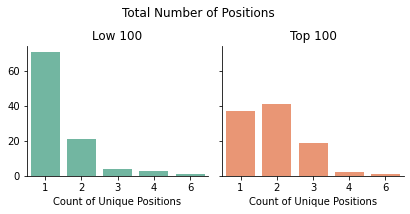

In [27]:
grid = sns.FacetGrid(data=position, col='top_bottom', hue='top_bottom', palette='Set2')
grid.map(sns.barplot, "Position_Count", "Index No")
grid.fig.subplots_adjust(top=0.8)
grid.fig.suptitle("Total Number of Positions")

axes = grid.axes.flatten()
axes[0].set_title("Low 100")
axes[1].set_title("Top 100")
axes[0].set_ylabel("")
axes[0].set_xlabel("Count of Unique Positions")
axes[1].set_xlabel("Count of Unique Positions")
plt.show();

- While majority of low performers had experience in only one position, more than half of top performers tried to work in multiple positions.


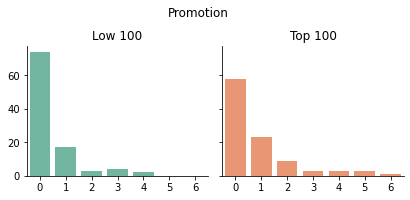

In [28]:
years = top_bottom.groupby(['top_bottom','Difference_incumbent'])['Index No'].count().reset_index()
grid = sns.FacetGrid(data = years, col='top_bottom', hue='top_bottom', palette='Set2')
grid.map(sns.barplot, "Difference_incumbent", "Index No")
grid.fig.subplots_adjust(top=0.8)
grid.fig.suptitle("Promotion")

axes = grid.axes.flatten()
axes[0].set_title("Low 100")
axes[1].set_title("Top 100")
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[1].set_xlabel("")
plt.show();

- Although more top performers received more than one promotion, compared to the low performers, most of them has remained in the same grade.

# Hypothesis Testing

One of the pre-existing hypotheses in UNDP & UNICEF is:

"A tour of duty in a hardship duty station will provide the employee with better
opportunities for promotion in their future career. UNDP encourages that staff
who want to move higher in the organization should have at least one of these
assignments during their careers"

I'd like to investigate this hypothesis by checking the relationship between hardship location experience and one's career success, such as performance rating and the level of promotion.


### Hypothesis Testing 1
### Does working at hardship duty station give you better chance to get higher performance score?

### 1) Chi-Square Test

The Chi-Square Test of Independence is used to test if two categorical variables are associated.
Chi-squared Test to see whether working experience in hardship duty station and performance score are dependent on each other. 

- Null hypothesis: The distribution of performance score is independent of working experience in hardship duty station.

- Alternative hypothesis: The distribution of performance score is dependent of working experience in hardship duty station.

We will divide the staffs into two groups: those who have been in the hardship duty station and those who have only been in the Headquarter.
- Hardship_level = {'H': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
- A is Hard E is the Most hardest and H is for HQ duty station

In [29]:
hardship_performance = finaldf[['Hardship_max','Performance_mean']]

Divide the staffs into two groups: 
- 1) People who have been in the hardship duty station at least one time during their years of service
- 2) People who have never been in the hardship duty station during their years of service

In [30]:
m = {"Yes": [1.0, 2.0, 3.0, 4.0, 5.0], "No": [0.0]}
m2 = {v: k for k,vv in m.items() for v in vv}
m2

{1.0: 'Yes', 2.0: 'Yes', 3.0: 'Yes', 4.0: 'Yes', 5.0: 'Yes', 0.0: 'No'}

In [31]:
hardship_performance["Hardship_or_not"]=hardship_performance.Hardship_max.map(m2).astype("category")

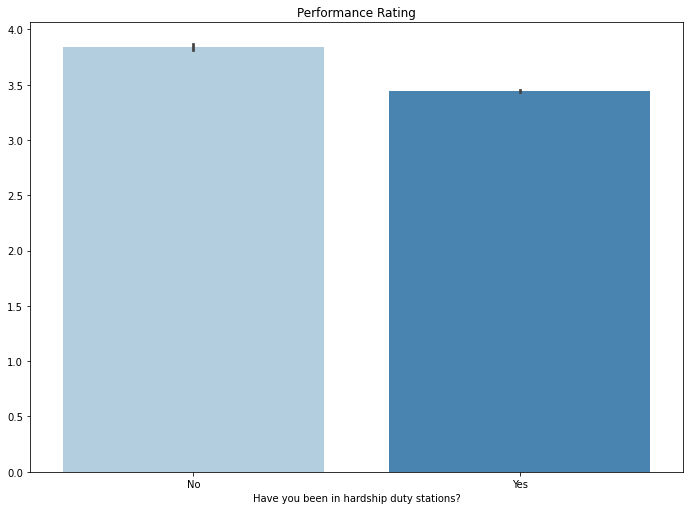

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(data=hardship_performance,
            x="Hardship_or_not",
            y="Performance_mean", palette="Blues")
plt.title('Performance Rating')
plt.xlabel('Have you been in hardship duty stations?')
plt.ylabel('')
plt.suptitle('')
plt.show();

In [33]:
# make two-way frequency table.
hardship_freq_ = pd.crosstab(index=hardship_performance['Performance_mean'], columns=hardship_performance['Hardship_or_not'])

In [34]:
from scipy.stats import chi2_contingency 
 
stat, p, dof, ex= chi2_contingency(hardship_freq_, correction=True) 
 
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('Accept NULL HYPOTHESIS') 

p value: 1.0500978209473745e-186
Reject NULL HYPOTHESIS


- This indicates that there is a strong association between these two variables.

### 2) Two Sample t-test

As we see the strong association between the two variables, hardship location experience & performance rating,
now I'd like to see whether the performance means of the two populations(people who have experience in hardship locations & those who doesn't) are the same or not. 

- Null Hypothesis: µ1 = µ2 (the two population means are equal)
- Alternative Hypothesis: µ1 ≠µ2 (the two population means are not equal)

In [44]:
# Divide UNDP & UNICEF staffs into two groups : Yes, No
Yes = hardship_performance[hardship_performance['Hardship_or_not']=='Yes']['Performance_mean']
No = hardship_performance[hardship_performance['Hardship_or_not']=='No']['Performance_mean']

In [50]:
print(len(Yes), len(No))

13694 1396


- The number of staffs with the hardship experience is 13694
- The number of staffs without the hardship experience is 1396

In [46]:
# First, check each group's variance.
# According to a document, we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1. 

print(np.var(Yes), np.var(No))

0.4332021889530206 0.30711724452179867


In [48]:
round(0.4332021889530206 /0.30711724452179867,3)

1.411

The ratio of the larger sample variance to the smaller sample variance is 1.411, which is less than 4. 
This means we can assume that the population variances are equal.

In [49]:
import scipy.stats as stats

#perform two sample t-test with equal variances
stats.ttest_ind(a=Yes, b=No, equal_var=True)

Ttest_indResult(statistic=-21.723783451508154, pvalue=4.613433806531027e-103)

The t test statistic is -21.72 and the corresponding two-sided p-value is 4.613433806531027e-103.

As a result, we can reject the null hypothesis and conclude that the mean performance rating between the two populations is different. 

All in all, working at hardship duty and performance score are two dependent variables, but working in hardship location does not guarantee better performance rating score. Rather, people who have only been in HQ tend to receive higher performance rating in the evaluation.

### Hypothesis Testing 2 
### Does working at hardship duty station give you better chance to get promoted?

### 1) Chi-Square Test

Test one of the existing hypotheses from the UNICEF and UNDP teams:

"A tour of duty in a hardship duty station will provide the employee with better opportunities for promotion in their future career. UNDP encourages that staff who want to move higher in the organization should have at least one of these assignments during their careers."

- Chi-squared test to see whether working at hardship duty station gives better chance to get promotions.


- Null hypothesis: The distribution of promotion (Difference in Incumbent grade) is independent of working experience in hardship duty station

- Alternative hypothesis: The distribution of promotion (Difference in Incumbent grade) is dependent of working experience in hardship duty station

Likewise, we will divide the staffs into two groups: those who have been in the hardship duty station and those who have only been in the Headquarter.

- Hardship_level = {'H': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
- A is Hard E is the Most hardest and H is for HQ duty station

In [52]:
promotion_hardship = finaldf[['Hardship_max', 'Difference_incumbent']]

In [53]:
m = {"Yes": [1.0, 2.0, 3.0, 4.0, 5.0], "No": [0.0]}
m2 = {v: k for k,vv in m.items() for v in vv}
m2

{1.0: 'Yes', 2.0: 'Yes', 3.0: 'Yes', 4.0: 'Yes', 5.0: 'Yes', 0.0: 'No'}

In [54]:
promotion_hardship["Hardship_or_not"] = promotion_hardship.Hardship_max.map(m2).astype("category")

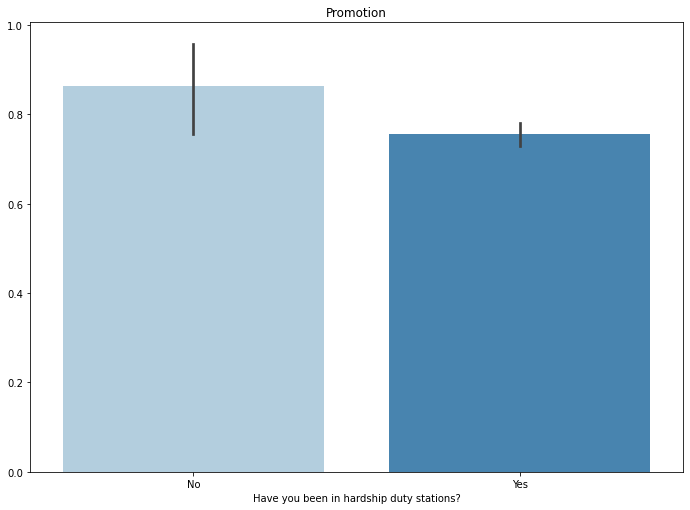

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.barplot(data=promotion_hardship,
            x="Hardship_or_not",
            y="Difference_incumbent", palette="Blues")
plt.title('Promotion')
plt.xlabel('Have you been in hardship duty stations?')
plt.ylabel('')
plt.suptitle('')
plt.show();

In [56]:
# make two-way frequency table.
hardship_freq_ = pd.crosstab(index = promotion_hardship['Difference_incumbent'], columns = promotion_hardship['Hardship_or_not'])

In [57]:
# make two-way frequency table.
stat, p, dof, ex= chi2_contingency(hardship_freq_, correction=True) 
 
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('Accept NULL HYPOTHESIS') 

p value: 2.172807705377238e-37
Reject NULL HYPOTHESIS


- This demonstrates that there is a strong association between the two variables, promotion and hardship_or_not.

### 2) Two Sample t-test

As we see the strong association between the two variables, hardship location experience & promotion,
now I'd like to see whether the promotion means of the two populations(people who have experience in hardship locations & those who doesn't) are the same or not. 

- Null Hypothesis: µ1 = µ2 (the two population means are equal)
- Alternative Hypothesis: µ1 ≠µ2 (the two population means are not equal)

In [58]:
# Divide UNDP & UNICEF staffs into two groups : Yes, No
Yes2 = promotion_hardship[promotion_hardship['Hardship_or_not']=='Yes']['Difference_incumbent']
No2 = promotion_hardship[promotion_hardship['Hardship_or_not']=='No']['Difference_incumbent']

In [59]:
# First, check each group's variance.
# According to a document, we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1. 

print(np.var(Yes2), np.var(No2))

2.165151200980329 3.3593073948489756


In [60]:
round(2.165151200980329/3.3593073948489756,3)

0.645

The ratio of the larger sample variance to the smaller sample variance is 0.645, which is less than 4. 
This means we can assume that the population variances are equal.

In [61]:
#perform two sample t-test with equal variances
stats.ttest_ind(a=Yes2, b=No2, equal_var=True)

Ttest_indResult(statistic=-2.5439710121461903, pvalue=0.010969901953342345)

The t test statistic is -2.543 and the corresponding two-sided p-value is 0.010969901953342345.

As a result, we can reject the null hypothesis and conclude that the mean performance rating between the two populations is different. 

Working experience at hardship duty and the degree of promotion they received are two dependent variables, but working in hardship location does not guarantee a better promotion. Rather, people who have only been in HQ tend to receive higher promoiton.

### Conclusion

- The two hypothesis testings seem to have the results that are against the pre-existing hypothesis, which assumed the positive relationship between promotion and working experience in hardship duty station.  

- There might be many other factors that lead to those results. For example, people who have been in the hardship locations might have had different capabilities, or it might be that the tasks at hardship location were too hard for the staffs to get higher performance score/better promotions than those who were in the HQ. 